# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [278]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [279]:
# Tampilkan 10 baris pertama dengan function head.
file_path = '/content/drive/MyDrive/Projek Akhir ML untuk pemula/bank_transactions_data_edited.csv'

df = pd.read_csv(file_path)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [280]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [281]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

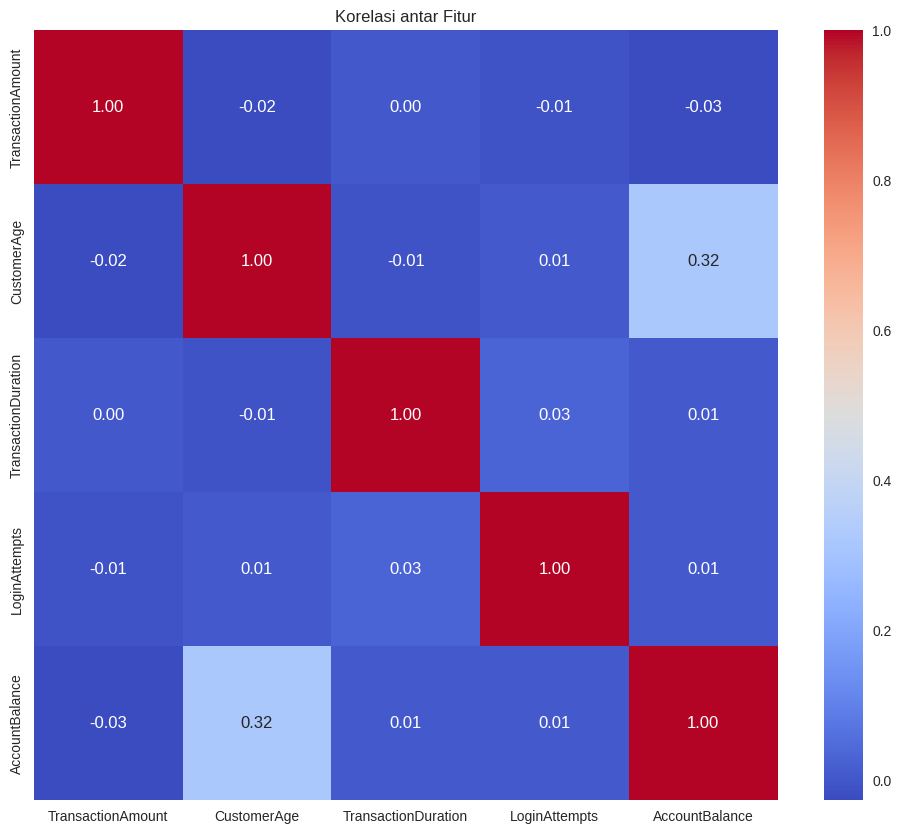

In [282]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_df = df.select_dtypes(include=np.number) # Extract numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Fitur')
plt.show()

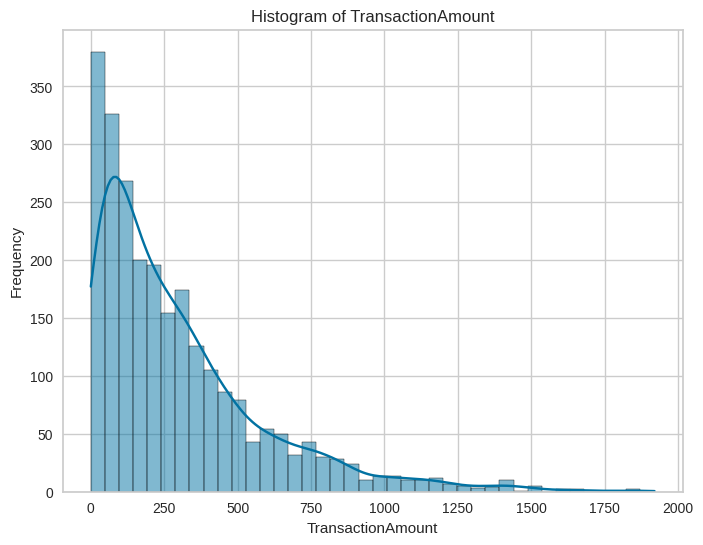

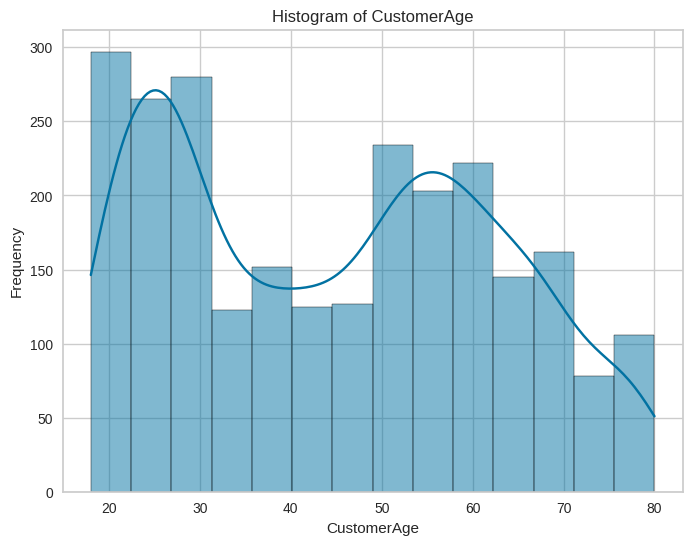

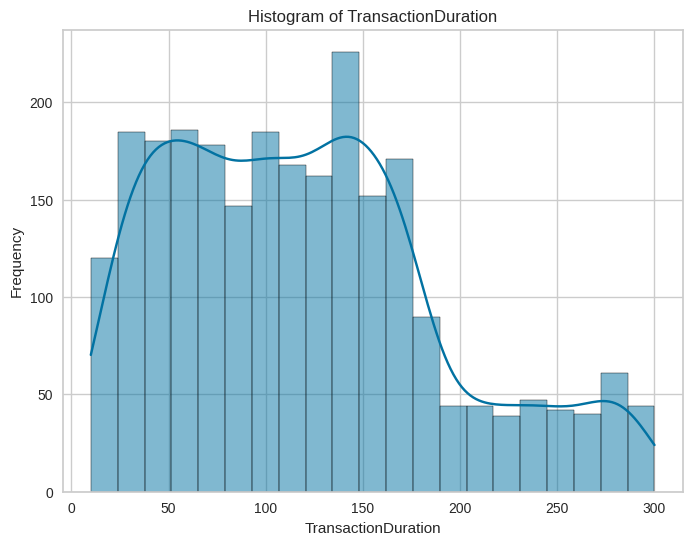

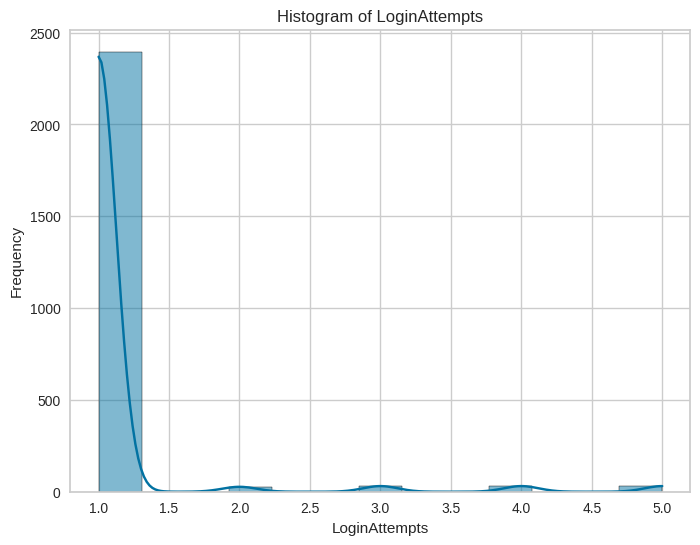

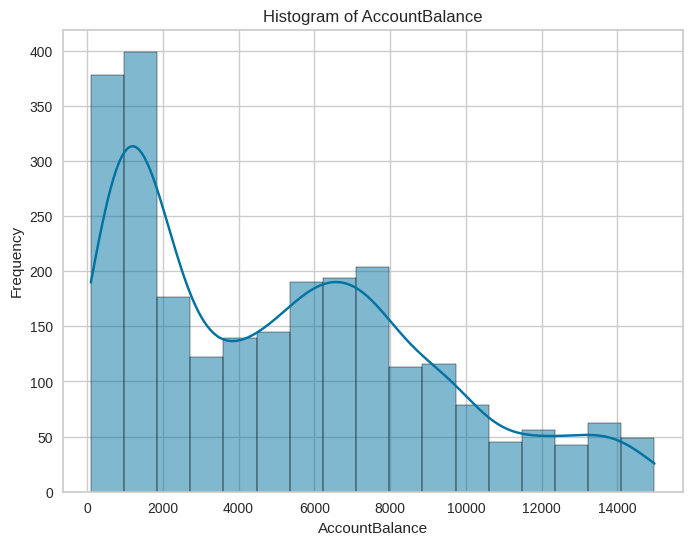

In [283]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numerical_features = df.select_dtypes(include=np.number).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # Menambahkan KDE untuk visualisasi distribusi
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [284]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [285]:
# Mengecek dataset menggunakan isnull().sum()
df_clear = df.isnull().sum()
print(df_clear)

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [286]:
# Mengecek dataset menggunakan duplicated().sum()
df_clear2 = df.duplicated().sum()
print(df_clear2)

21


In [287]:
# Melakukan drop pada kolom yang memiliki keterangan id
df.drop(['TransactionID', 'DeviceID', 'AccountID', 'MerchantID', 'IP Address'], axis=1, inplace=True)
df

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...
2532,230.08,2023-05-01 16:23:40,Debit,Austin,Online,79.0,Retired,124.0,1.0,4466.10,2024-11-04 08:11:47
2533,561.58,2023-06-23 17:38:26,Debit,Sacramento,Online,65.0,Doctor,23.0,1.0,11748.86,2024-11-04 08:06:32
2534,493.11,2023-07-31 16:25:26,Debit,Colorado Springs,Branch,53.0,Retired,236.0,1.0,7432.99,2024-11-04 08:08:01
2535,198.62,2023-05-15 16:19:14,Credit,Tucson,Branch,27.0,Student,84.0,1.0,1196.07,2024-11-04 08:06:38


In [288]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Mengidentifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

# Melakukan scaling pada kolom numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Menampilkan DataFrame setelah scaling
print(df.head())

   TransactionAmount      TransactionDate TransactionType   Location Channel  \
0          -0.970546  2023-04-11 16:29:14           Debit  San Diego     ATM   
1           0.268963  2023-06-27 16:44:19           Debit    Houston     ATM   
2          -0.586526  2023-07-10 18:16:08           Debit       Mesa  Online   
3          -0.387294  2023-05-05 16:32:11           Debit    Raleigh  Online   
4          -0.972736  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862             Doctor            -0.548393      -0.204629   
1     1.307715             Doctor             0.307960      -0.204629   
2    -1.439874            Student            -0.905207      -0.204629   
3    -1.047361            Student            -1.347656      -0.204629   
4          NaN            Student             1.121495      -0.204629   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:

In [289]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengidentifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Saat encode (waktu preprocessing awal)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # simpan encoder-nya

# Menampilkan DataFrame setelah encoding
print(df.head())

   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
4          -0.972736             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
4          NaN                   3             1.121495      -0.204629   

   AccountBalance  PreviousTransactionDate  
0       -0.000315                      105  
1 

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [290]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.dropna(inplace=True)
df

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
5,-0.703375,635,1,28,0,-1.495947,3,0.750409,-0.204629,-1.111505,13
...,...,...,...,...,...,...,...,...,...,...,...
2532,-0.231290,781,1,2,2,1.924521,2,0.065326,-0.204629,-0.166103,323
2533,0.903315,1154,1,34,2,1.139496,0,-1.376201,-0.204629,1.702613,9
2534,0.668967,1380,1,7,1,0.466617,2,1.663852,-0.204629,0.595184,98
2535,-0.338966,865,0,40,1,-0.991288,3,-0.505576,-0.204629,-1.005175,15


In [291]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
df

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
5,-0.703375,635,1,28,0,-1.495947,3,0.750409,-0.204629,-1.111505,13
...,...,...,...,...,...,...,...,...,...,...,...
2510,-0.382263,376,1,10,2,-1.215581,3,-1.433292,-0.204629,-0.856135,358
2511,-0.186796,298,0,17,2,-1.159507,3,-0.377123,-0.204629,-1.278402,86
2523,-0.977083,734,1,27,1,1.756301,2,-0.605484,-0.204629,-0.052396,74
2524,-0.224308,2461,1,29,0,-0.430555,1,-0.976570,-0.204629,0.404504,174


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


Jumlah data sebelum outlier removal: (2398, 11)
Outliers in Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object'):
      TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0                   NaN              NaN              NaN       NaN      NaN   
1                   NaN              NaN              NaN       NaN      NaN   
2                   NaN              NaN              NaN       NaN      NaN   
3                   NaN              NaN              NaN       NaN      NaN   
5                   NaN              NaN              NaN       NaN      NaN   
...                 ...              ...              ...       ...      ...   
2510                NaN              NaN              NaN       NaN      NaN   
2511                NaN              NaN          

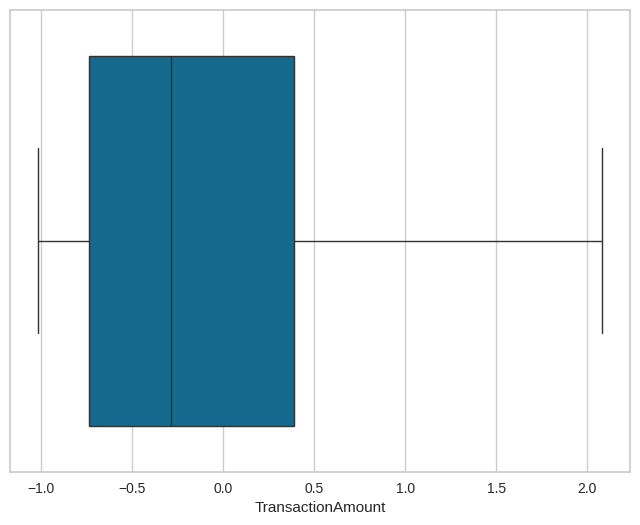

Outliers in TransactionAmount:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for TransactionAmount:


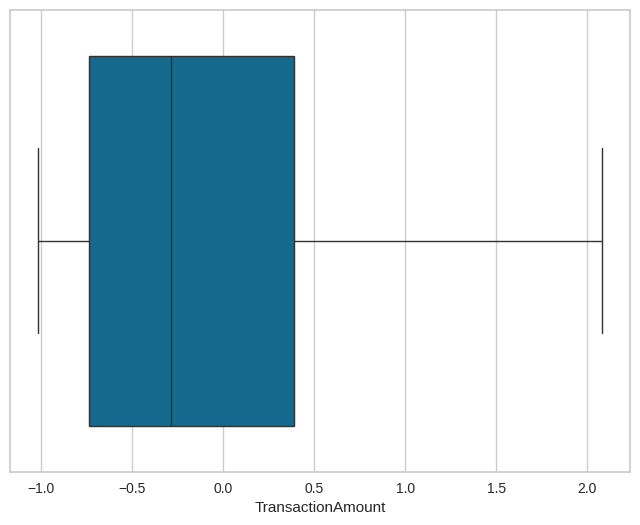

Before handling outliers for TransactionDate:


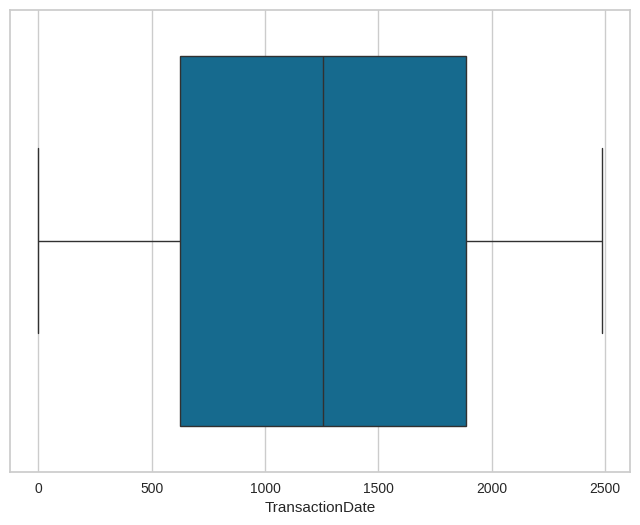

Outliers in TransactionDate:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for TransactionDate:


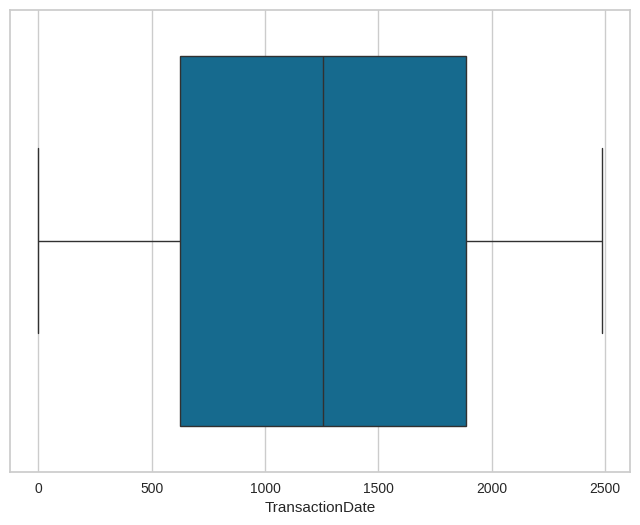

Before handling outliers for TransactionType:


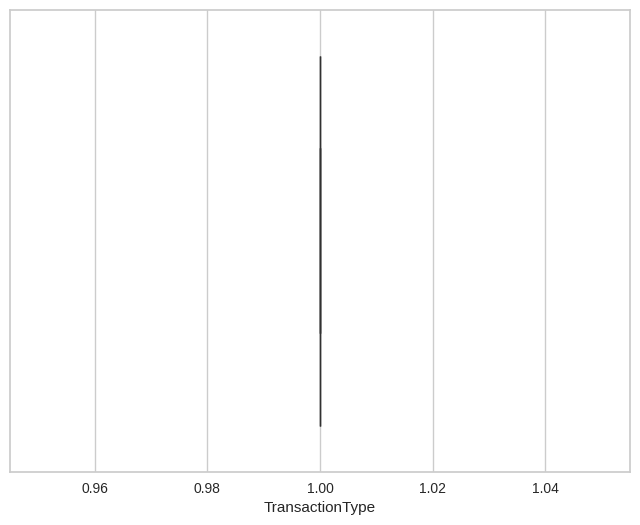

Outliers in TransactionType:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for TransactionType:


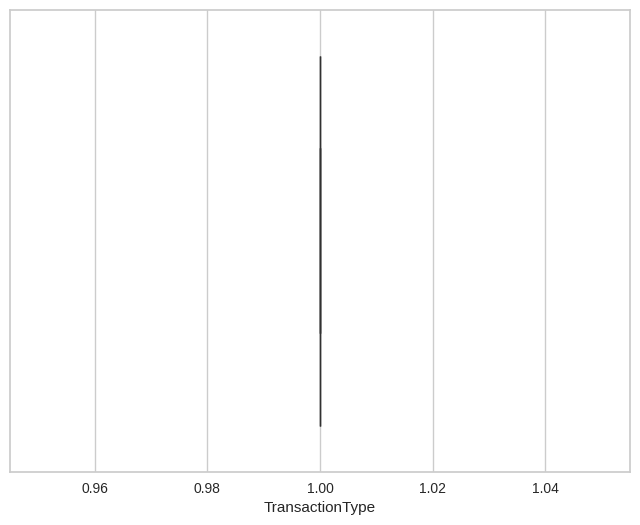

Before handling outliers for Location:


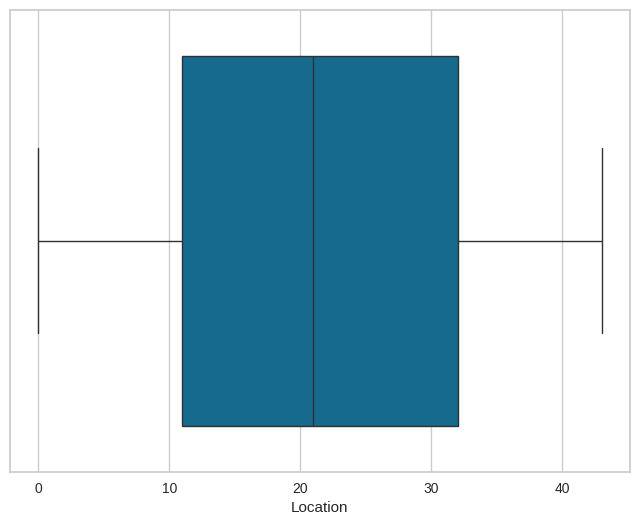

Outliers in Location:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for Location:


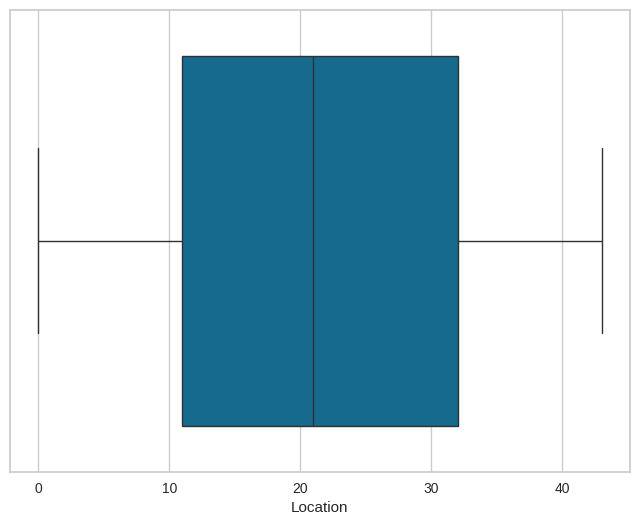

Before handling outliers for Channel:


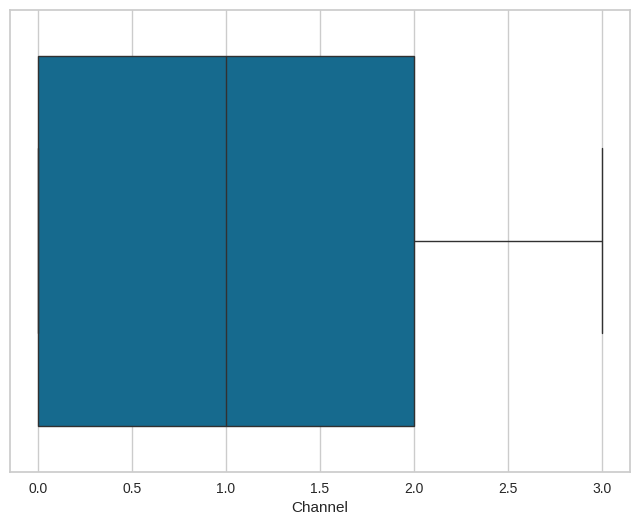

Outliers in Channel:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for Channel:


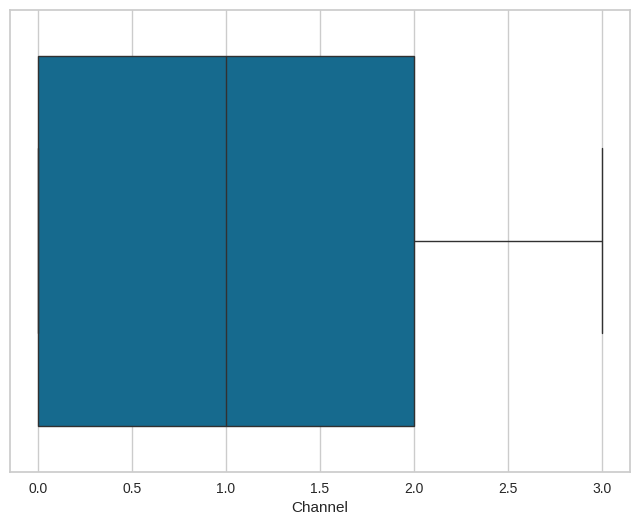

Before handling outliers for CustomerAge:


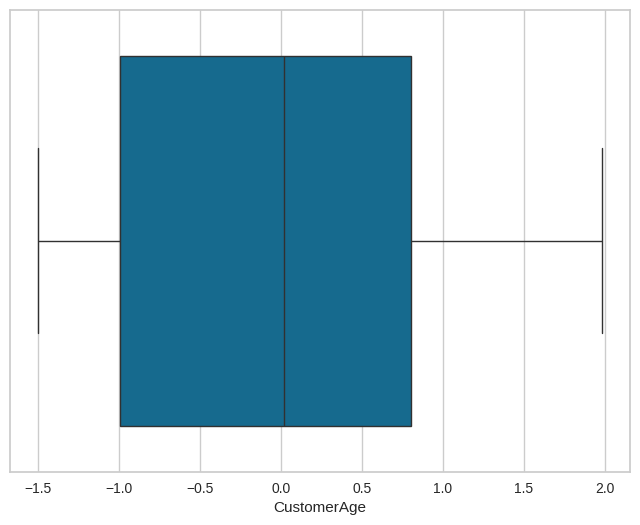

Outliers in CustomerAge:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for CustomerAge:


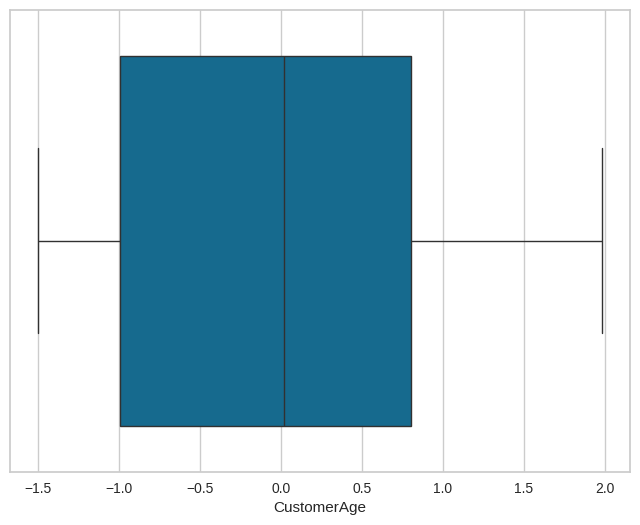

Before handling outliers for CustomerOccupation:


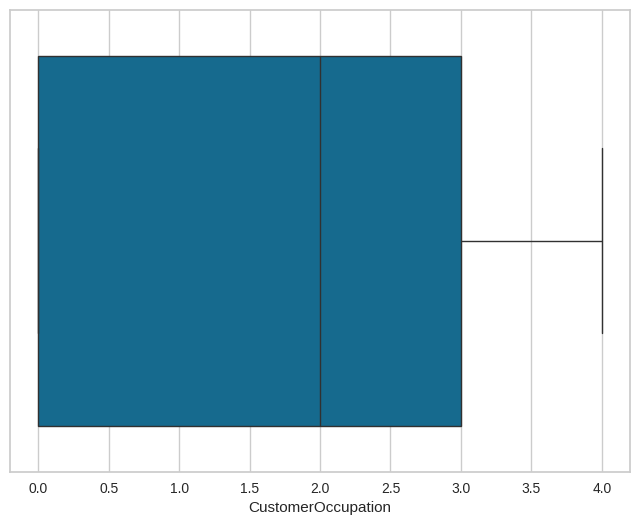

Outliers in CustomerOccupation:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for CustomerOccupation:


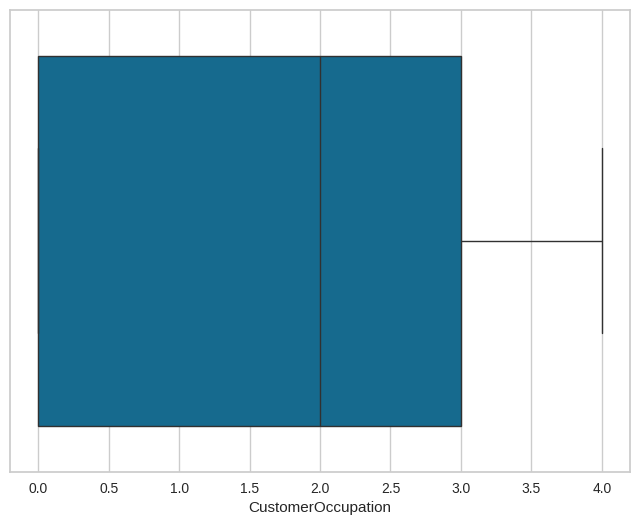

Before handling outliers for TransactionDuration:


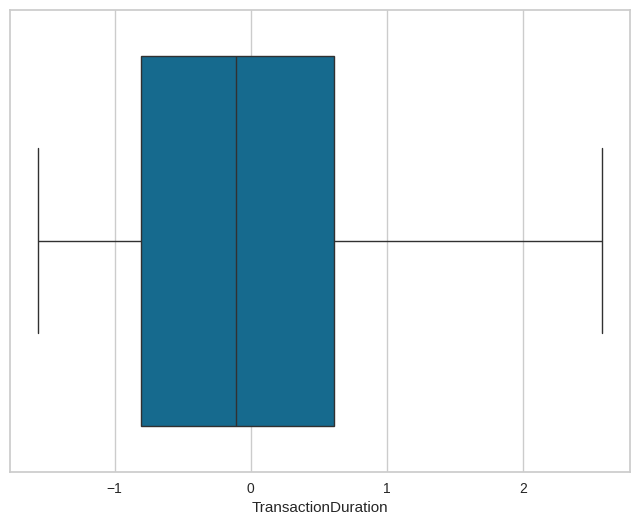

Outliers in TransactionDuration:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for TransactionDuration:


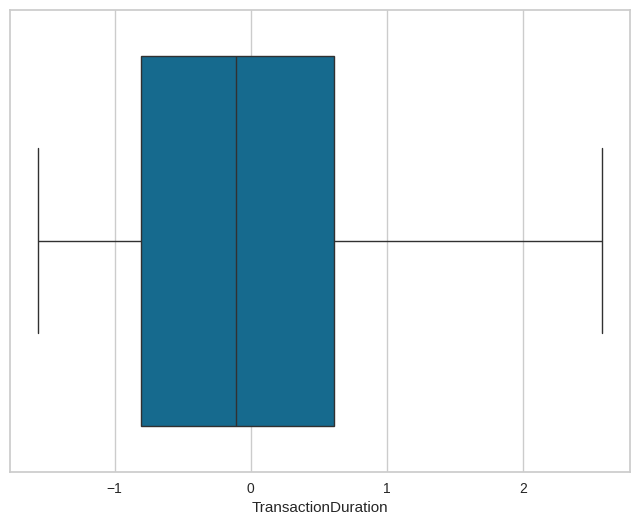

Before handling outliers for LoginAttempts:


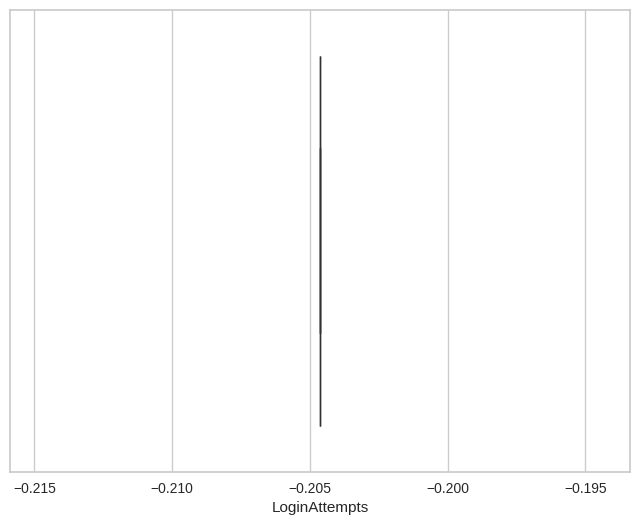

Outliers in LoginAttempts:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for LoginAttempts:


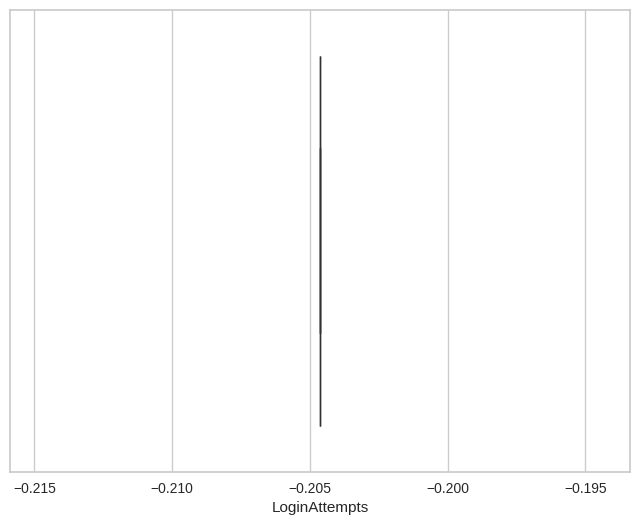

Before handling outliers for AccountBalance:


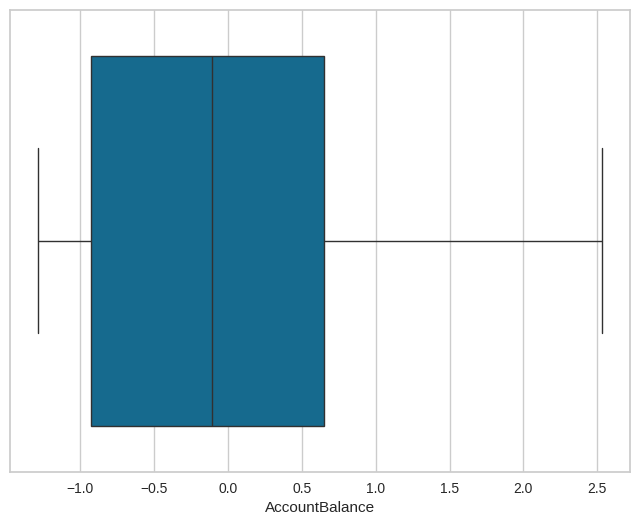

Outliers in AccountBalance:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for AccountBalance:


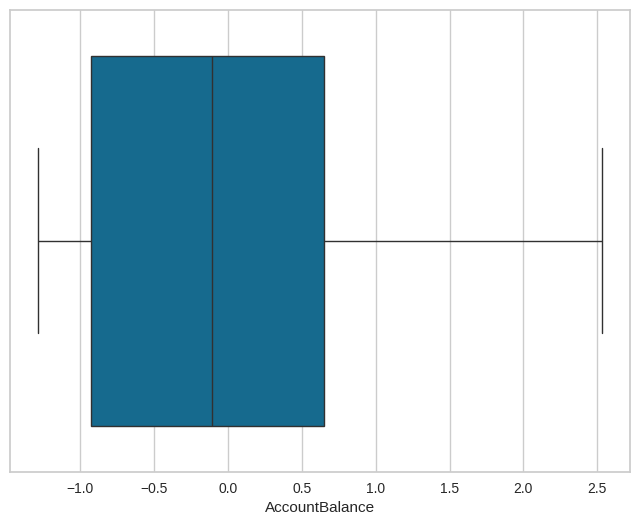

Before handling outliers for PreviousTransactionDate:


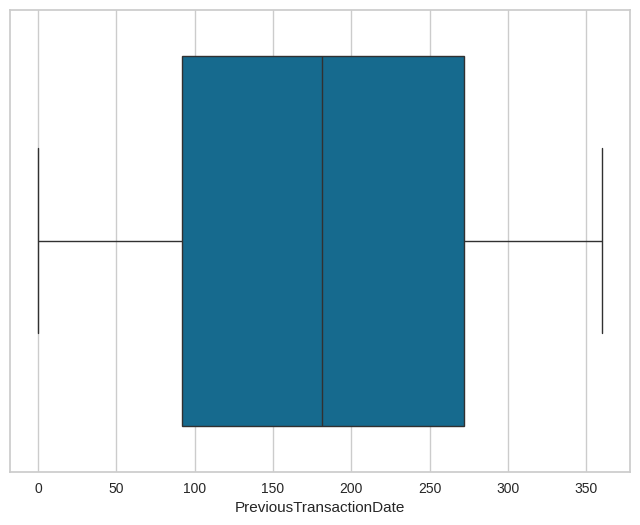

Outliers in PreviousTransactionDate:
Empty DataFrame
Columns: [TransactionAmount, TransactionDate, TransactionType, Location, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
After handling outliers for PreviousTransactionDate:


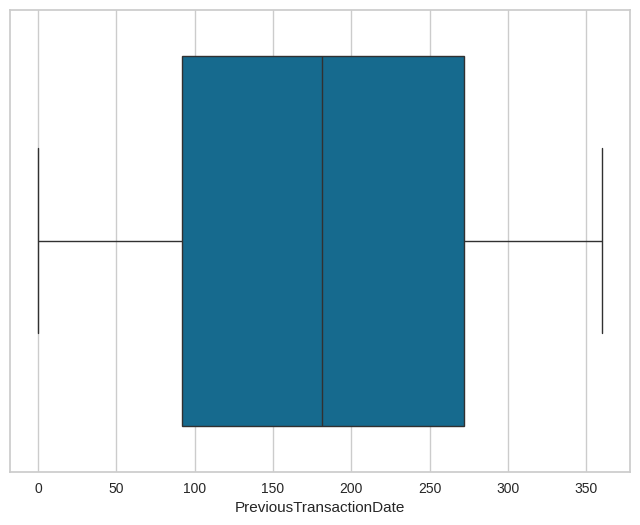

In [292]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Handling Outlier using IQR method
def remove_outliers_iqr(data, column): # Change 'columns' to 'column'
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"Outliers in {column}:")
    print(outliers)

    # Replace outliers with the upper or lower bound
    df[column] = np.where(df[column] > upper, upper, df[column])
    df[column] = np.where(df[column] < lower, lower, df[column])
    return df

numerical_cols = df.select_dtypes(include=np.number).columns

print("\nJumlah data sebelum outlier removal:", df.shape)
df = remove_outliers_iqr(df, numerical_cols) # Pass the list of numerical columns
print("Jumlah data setelah outlier removal:", df.shape)

# Iterate through the numerical columns and apply outlier removal
for col in numerical_cols:
  print(f"Before handling outliers for {col}:")
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.show()
  df = remove_outliers_iqr(df, col) # Pass the current column name to the function
  print(f"After handling outliers for {col}:")
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.show()

In [293]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
# Binning for AccountBalance
df['AccountBalance_Binned'] = pd.cut(df['AccountBalance'], bins=5, labels=False)

# Binning for CustomerAge
df['CustomerAge_Binned'] = pd.cut(df['CustomerAge'], bins=4, labels=False)

# Encoding the binned features using LabelEncoder
le = LabelEncoder()
df['AccountBalance_Binned'] = le.fit_transform(df['AccountBalance_Binned'])
df['CustomerAge_Binned'] = le.fit_transform(df['CustomerAge_Binned'])

print(df[['AccountBalance', 'AccountBalance_Binned', 'CustomerAge', 'CustomerAge_Binned']].head())

   AccountBalance  AccountBalance_Binned  CustomerAge  CustomerAge_Binned
0       -0.000315                      1     1.419862                   3
1        2.218381                      4     1.307715                   3
2       -1.024091                      0    -1.439874                   0
3        0.886694                      2    -1.047361                   0
5       -1.111505                      0    -1.495947                   0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [294]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AccountBalance_Binned,CustomerAge_Binned
count,2398.000000,2398.000000,2398.0,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2.398000e+03,2398.000000,2398.000000,2398.000000,2398.000000
mean,-0.045635,1256.404921,1.0,21.383653,1.013344,-0.003388,1.532110,0.000832,-2.046294e-01,-0.006050,180.984987,1.227690,1.253962
std,0.856137,726.716182,0.0,12.417622,0.831075,1.000136,1.153802,1.003159,9.883046e-15,1.001030,103.757245,1.266309,1.109059
min,-1.017881,0.000000,1.0,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000,0.000000
25%,-0.737943,626.250000,1.0,11.000000,0.000000,-0.991288,0.000000,-0.805299,-2.046294e-01,-0.929992,92.000000,0.000000,0.000000
50%,-0.290005,1254.500000,1.0,21.000000,1.000000,0.018031,2.000000,-0.105944,-2.046294e-01,-0.110335,181.000000,1.000000,1.000000
75%,0.389115,1884.750000,1.0,32.000000,2.000000,0.803056,3.000000,0.607683,-2.046294e-01,0.652406,271.750000,2.000000,2.000000
max,2.079702,2485.000000,1.0,43.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000,4.000000,3.000000


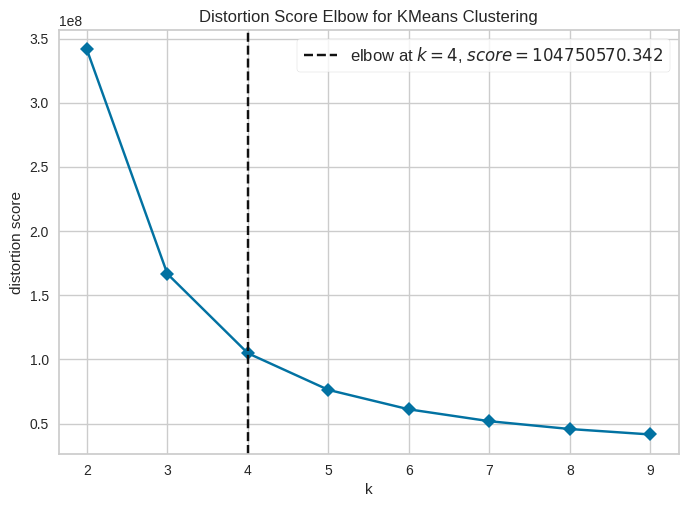

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [295]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans
model_kmeans = KMeans()

# Visualisasi Elbow Method
visualizer = KElbowVisualizer(model_kmeans, k=(2,10), timings=False)
visualizer.fit(df)
visualizer.show()

In [296]:
# Menggunakan algoritma K-Means Clustering
# paling optimal k=4
Kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = Kmeans.fit_predict(df)

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AccountBalance_Binned,CustomerAge_Binned,Cluster
0,-0.970546,680.0,1.0,36.0,0.0,1.419862,0.0,-0.548393,-0.204629,-0.000315,105.0,1,3,0
1,0.268963,1178.0,1.0,15.0,0.0,1.307715,0.0,0.307960,-0.204629,2.218381,192.0,4,3,0
2,-0.586526,1262.0,1.0,23.0,2.0,-1.439874,3.0,-0.905207,-0.204629,-1.024091,41.0,0,0,0
3,-0.387294,818.0,1.0,33.0,2.0,-1.047361,3.0,-1.347656,-0.204629,0.886694,163.0,2,0,0
5,-0.703375,635.0,1.0,28.0,0.0,-1.495947,3.0,0.750409,-0.204629,-1.111505,13.0,0,0,0


Jalankan cell code ini untuk menyimpan model kamu.

In [297]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
joblib.dump(Kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

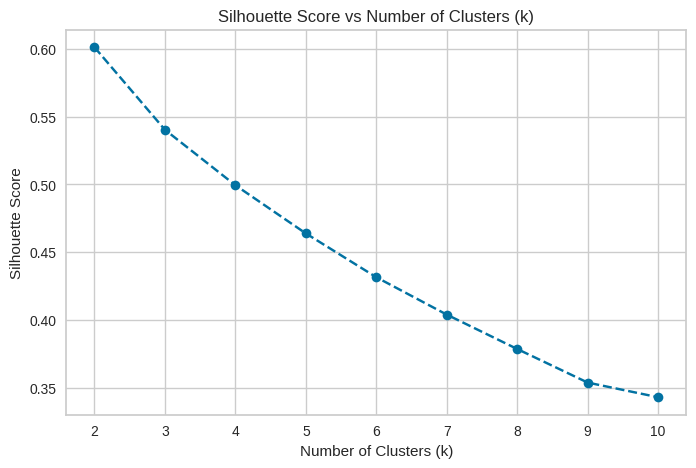

Best Silhouette Score: 0.6011138467808502


In [298]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_scores = []
range_n_clusters = range(2, 11)

# Calculate silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {max(silhouette_scores)}")

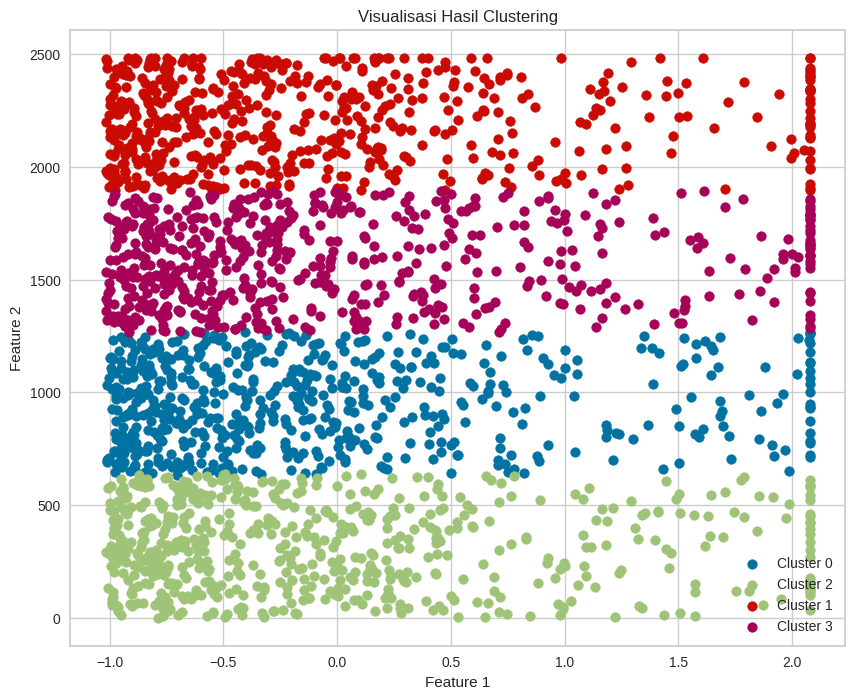

In [299]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 8))

# Scatter plot untuk setiap cluster
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Feature 1')  # Ganti dengan nama fitur yang sesuai
plt.ylabel('Feature 2')  # Ganti dengan nama fitur yang sesuai
plt.title('Visualisasi Hasil Clustering')
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [300]:
# Membangun model menggunakan PCA.
# Inisialisasi PCA
pca = PCA(n_components=2)  # Mengurangi dimensi menjadi 2 komponen utama

# Melakukan PCA pada data
df_pca = pca.fit_transform(df)

# Membuat DataFrame baru dari hasil PCA
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-576.251169,-77.178319
1,-78.427487,10.885951
2,5.870981,-139.980063
3,-438.366338,-18.895730
4,-621.071698,-169.235068


In [301]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [302]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

fitur_numerik = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance'
]

fitur_binned = ['AccountBalance_Binned', 'CustomerAge_Binned', 'Target']

# Statistik deskriptif tiap cluster
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    print(f"\nInterpretasi Cluster {cluster_label}:")

    # Statistik numerik: min, max, mean
    cluster_summary = cluster_data[fitur_numerik].agg(['min', 'max', 'mean'])
    print(cluster_summary)

    # Ambil semua kolom dan filter kolom kategorikal
    all_cols = df.columns
    categorical_cols = [col for col in all_cols
                        if col not in fitur_numerik
                        and col != 'Cluster'
                        and col not in fitur_binned]

    # Modus untuk fitur kategorikal
    for col in categorical_cols:
        if not cluster_data[col].mode().empty:
            modus = cluster_data[col].mode()[0]
            print(f"- Modus dari kolom '{col}': {modus}")



Interpretasi Cluster 0:
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
min           -1.013945    -1.495947            -1.561745      -0.204629   
max            2.079702     1.980594             2.548750      -0.204629   
mean          -0.072440     0.021291            -0.005586      -0.204629   

      AccountBalance  
min        -1.284661  
max         2.512436  
mean       -0.026985  
- Modus dari kolom 'TransactionDate': 635.0
- Modus dari kolom 'TransactionType': 1.0
- Modus dari kolom 'Location': 16.0
- Modus dari kolom 'Channel': 1.0
- Modus dari kolom 'CustomerOccupation': 3.0
- Modus dari kolom 'PreviousTransactionDate': 55.0

Interpretasi Cluster 2:
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
min           -1.015827    -1.495947            -1.561745      -0.204629   
max            2.079702     1.980594             2.563023      -0.204629   
mean          -0.049733    -0.062166            -0.044472      -0.204629 

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Pasif dengan Aktivitas Rendah)**:
  - **Rata-rata (mean) TransactionAmount :** -0,072 (286,02)
  - **Rata-rata (mean) CustomerAge :** 0.021 (62,373)
  - **Rata-rata (mean) TransactionDuration :** -0,0055 (93,591)
  - **Rata-rata (mean) AccountBalance :** -0,0269 (4478,78)
  - **Rata-rata (mean) LoginAttempts :** -0,204 (1)
  - **Modus (modus) Occupation :** 3 (Retired)
  - **Analisis:** Nasabah dalam cluster ini memiliki aktivitas transaksi dan saldo akun yang rendah. Meskipun umur pelanggan cukup rata-rata, nilai transaksi dan saldo menunjukkan perilaku pasif. Ini bisa jadi pelanggan baru atau kurang tertarik pada layanan tambahan.

2. **Cluster 1: (Nasabah Aktif dengan Saldo Lebih Tinggi)**:
  - **Rata-rata (mean) TransactionAmount :** -0,0705 (267,66)
  - **Rata-rata (mean) CustomerAge :** 0,071 (44,67)
  - **Rata-rata (mean) TransactionDuration :** 0.014 (235,19)
  - **Rata-rata (mean) AccountBalance :** -0,026 (5029,78)
  - **Modus (modus) Channel :** 2 (Branch)
  - **Modus (modus) Occupation :** 1 (Engineer)
  - **Analisis:** Cluster ini mewakili nasabah dengan tingkat aktivitas yang lebih tinggi dan saldo akun di atas rata-rata. Mereka tampaknya lebih rutin menggunakan layanan perbankan dan berpotensi menjadi pelanggan prioritas.

3. **Cluster 2: (Nasabah Reguler dengan Perilaku Rata-rata)**:
  - **Rata-rata (mean) TransactionAmount :** -0,049 (293,17)
  - **Rata-rata (mean) CustomerAge :** -0,062 (25,81)
  - **Rata-rata (mean) TransactionDuration :** -0,044 (96,60)
  - **Rata-rata (mean) AccountBalance :** -0,0012 (1617,92)
  - **Modus (modus) CustomurOccupation :** 0 (Student)
  - **Analisis:** Pelanggan dalam kelompok ini memiliki perilaku transaksi yang sangat umum. Nilai-nilai mean mendekati nol, yang menandakan kelompok dengan profil standar. Kemungkinan besar ini adalah pelanggan reguler yang tidak terlalu menonjol secara risiko atau peluang.

4. **Cluster 3: (Nasabah Jarang Transaksi tapi Berpotensi Tinggi)**:
  - **Rata-rata (mean) TransactionAmount :** 0,010 (282,85)
  - **Rata-rata (mean) CustomerAge :** 0.021 (44,45)
  - **Rata-rata (mean) TransactionDuration :** 0,039 (100,94)
  - **Rata-rata (mean) AccountBalance :** -0,0219 (10.142,02)
  - **Modus (modus) PreviousTransactionDate :** 360 (2024-11-04 08:09:17)
  - **Analisis:** Nasabah dalam kelompok ini tidak sering bertransaksi, namun saat bertransaksi, cenderung cukup aktif dan durasi transaksi lebih lama. Bisa jadi ini pelanggan dorman namun bernilai tinggi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [303]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [304]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [305]:
# inverse dataset ke rentang normal
X_original = df.copy()  # Create a copy of the original DataFrame
X_original[fitur_numerik] = df[fitur_numerik].values
X_original[categorical_cols] = df[categorical_cols].values
X_original['Cluster'] = Kmeans.fit_predict(X_original[fitur_numerik])  # Use X_original for prediction

# Correctly apply inverse_transform to the numerical columns
X_original[fitur_numerik] = scaler.inverse_transform(X_original[fitur_numerik]) # Pass the list of numerical features
for col in categorical_cols:
    X_original[col] = X_original[col].astype(int)
    le = label_encoders[col]  # ambil encoder yang sudah di-fit
    X_original[col] = le.inverse_transform(X_original[col])

df_original = X_original

# Statistik deskriptif tiap cluster
for cluster_label1 in df_original['Cluster'].unique():
    cluster_data1 = df_original[df_original['Cluster'] == cluster_label1]
    print(f"\nInterpretasi Cluster {cluster_label1}:")

    # Statistik numerik: min, max, mean
    cluster_summary1 = cluster_data1[fitur_numerik].agg(['min', 'max', 'mean'])
    print(cluster_summary1)

    # Ambil semua kolom dan filter kolom kategorikal
    all_cols = df_original.columns
    categorical_cols_for_summary = [
        col for col in all_cols
        if col not in fitur_numerik
        and col != 'Cluster'
        and col not in fitur_binned
    ]

    # Modus untuk fitur kategorikal
    for col in categorical_cols_for_summary:
        if not cluster_data1[col].mode().empty:
            modus = cluster_data1[col].mode()[0]
            print(f"- Modus dari kolom '{col}': {modus}")


Interpretasi Cluster 0:
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
min            0.840000    40.000000             10.00000            1.0   
max          905.287500    80.000000            204.00000            1.0   
mean         286.022256    62.373478             93.59134            1.0   

      AccountBalance  
min       120.890000  
max      9127.650000  
mean     4478.783058  
- Modus dari kolom 'TransactionDate': 2023-01-02 16:06:29
- Modus dari kolom 'TransactionType': Debit
- Modus dari kolom 'Location': Charlotte
- Modus dari kolom 'Channel': ATM
- Modus dari kolom 'CustomerOccupation': Retired
- Modus dari kolom 'PreviousTransactionDate': 2024-11-04 08:07:01

Interpretasi Cluster 3:
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
min            0.320000    18.000000            10.000000            1.0   
max          905.287500    70.000000           225.000000            1.0   
mean         282.856992    44.451

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Pasif dengan Aktivitas Rendah)**:
  - **Rata-rata (mean) TransactionAmount :** 286,02
  - **Rata-rata (mean) CustomerAge :** 62,37
  - **Rata-rata (mean) TransactionDuration :** 93,59
  - **Rata-rata (mean) AccountBalance :** 4478,78
  - **Rata-rata (mean) LoginAttempts :** 1
  - **Modus (modus) Occupation :** Retired
  - **Analisis:** Nasabah dalam cluster ini memiliki aktivitas transaksi dan saldo akun yang rendah. Meskipun umur pelanggan cukup rata-rata, nilai transaksi dan saldo menunjukkan perilaku pasif. Ini bisa jadi pelanggan baru atau kurang tertarik pada layanan tambahan.

2. **Cluster 1: (Nasabah Aktif dengan Saldo Lebih Tinggi)**:
  - **Rata-rata (mean) TransactionAmount :** 267,66
  - **Rata-rata (mean) CustomerAge :** 44,67
  - **Rata-rata (mean) TransactionDuration :** 235,19
  - **Rata-rata (mean) AccountBalance :** 5029,78
  - **Modus (modus) Channel :** Branch
  - **Modus (modus) Occupation :** Engineer
  - **Analisis:** Cluster ini mewakili nasabah dengan tingkat aktivitas yang lebih tinggi dan saldo akun di atas rata-rata. Mereka tampaknya lebih rutin menggunakan layanan perbankan dan berpotensi menjadi pelanggan prioritas.

3. **Cluster 2: (Nasabah Reguler dengan Perilaku Rata-rata)**:
  - **Rata-rata (mean) TransactionAmount :** 293,17
  - **Rata-rata (mean) CustomerAge :** 25,81
  - **Rata-rata (mean) TransactionDuration :** 96,60
  - **Rata-rata (mean) AccountBalance :** 1617,92
  - **Modus (modus) CustomurOccupation :** Student
  - **Analisis:** Pelanggan dalam kelompok ini memiliki perilaku transaksi yang sangat umum. Nilai-nilai mean mendekati nol, yang menandakan kelompok dengan profil standar. Kemungkinan besar ini adalah pelanggan reguler yang tidak terlalu menonjol secara risiko atau peluang.

4. **Cluster 3: (Nasabah Jarang Transaksi tapi Berpotensi Tinggi)**:
  - **Rata-rata (mean) TransactionAmount :** 282,85
  - **Rata-rata (mean) CustomerAge :** 44,45
  - **Rata-rata (mean) TransactionDuration :** 100,94
  - **Rata-rata (mean) AccountBalance :** 10.142,02
  - **Modus (modus) PreviousTransactionDate :** 2024-11-04 08:09:17
  - **Analisis:** Nasabah dalam kelompok ini tidak sering bertransaksi, namun saat bertransaksi, cenderung cukup aktif dan durasi transaksi lebih lama. Bisa jadi ini pelanggan dorman namun bernilai tinggi.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [306]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_original.rename(columns={'Cluster': 'Target'}, inplace=True)

In [307]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_original.to_csv('data_clustering_inverse.csv', index=False)